<a href="https://colab.research.google.com/github/siranjeevi1007/Codsoft/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a custom dataset
data = {
    'Genre': ['Action', 'Comedy', 'Drama', 'Thriller', 'Action', 'Comedy', 'Drama', 'Thriller'],
    'Director': ['Nolan', 'Spielberg', 'Zoya', 'Rajamouli', 'Tarantino', 'Hirani', 'Anurag', 'Shankar'],
    'Actor_Popularity': [85, 78, 67, 90, 95, 70, 60, 88],
    'Duration': [150, 120, 135, 140, 155, 110, 130, 145],
    'Rating': [8.9, 7.5, 7.8, 8.6, 9.1, 7.2, 7.0, 8.7]
}

df = pd.DataFrame(data)

# Step 2: Define features and target
X = df.drop('Rating', axis=1)
y = df['Rating']

# Step 3: Create preprocessing pipeline for categorical features
categorical_features = ['Genre', 'Director']
numeric_features = ['Actor_Popularity', 'Duration']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Step 4: Build full pipeline with model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 5: Split data and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

print("Predicted Ratings:", y_pred)
print("Actual Ratings:", list(y_test))
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Predicted Ratings: [7.3995062  6.76147278]
Actual Ratings: [7.5, 7.2]
R2 Score: -3.497891707099641
MSE: 0.10120256340974179


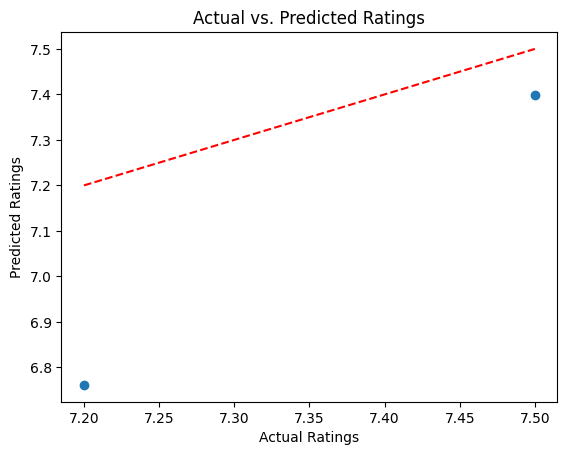

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")

# Add a diagonal line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()